# Um breve resumo da história
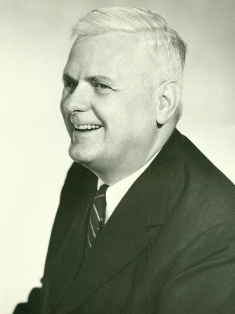

* Em **1930** Alonzo Church, orientador de Alan Turing, desenvolve o Cálculo Lambda (λ). A idéia principal era desenvolver o sistema mais simples possível capaz de estudar **funções** e aplicação de **funções**.

  Exemplo:
  * Função identidade: `λx.x`
  * Aplicação da função identidade: `(λx.x) 2` -> `2`;
    
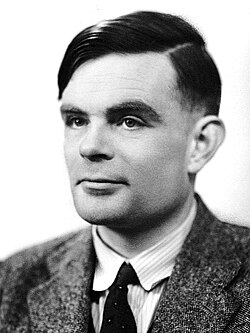    
* Em **1936** Alan Turing invente a *"a-machine"* (automatic machine -> máquina automática), futuramente chamada de Máquina de Turing por Alonzo Church em uma revisão do paper do Alan Turing. O objetivo era prover uma descrição matemática de um dispositivo simples capaz de fazer computações arbitrárias e, a partir deste, mostrar propriedades da computação em geral. Com isso, Turing mostrou que o [problema da decisão](https://pt.wikipedia.org/wiki/Entscheidungsproblem) é não computável.
  
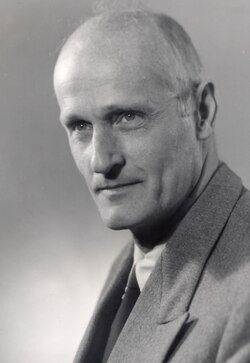
* Em **1952** Stephen Cole Kleene cunha o termo "Tese de Church-Turing" em seu paper *Recursive Predicates and Quantifiers*. A Tese de Church-Turing demonstra a equivalência entre Cálculo Lambda e a Máquina de Turing, ou melhor, nas palavras de Turing: "Toda 'função que seria naturalmente considerada computável' pode ser computada por uma Máquina de Turing.".

Uma anologia é dizer que o Cálculo Lambda representa a abstração Linguagens de Programaçã, enquanto a Máquina de Turing simboliza o comportante do hardware.

# Ok... E cadê o banco de dados?
Calma pequeno gafanhoto, já chegamos lá.

Mas para entender um banco do **dados** precisamos primeiro nos questionar: O que é **dado**?

Os primeiros computares separavam os **dados** do **programa**. O programa era uma "caixa preta" que recebia dados, fazia computações e devolvia novos dados.

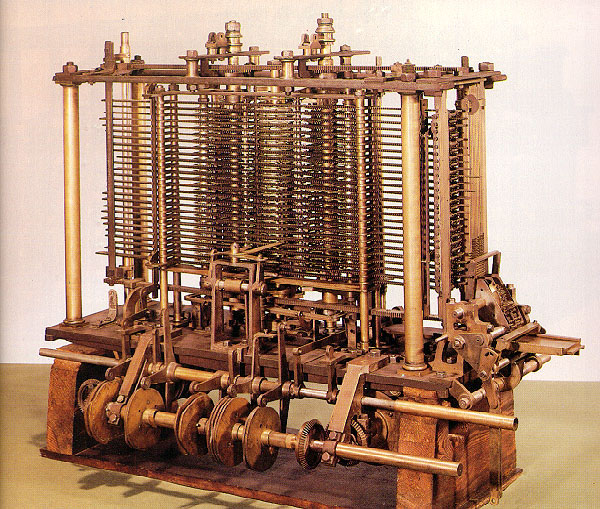

A máquina diferencial de Charles Baggage sendo o exemplo mais clássico.

As máquinas não eram programáveis através de linguagens, mas sim através das engrenagens.

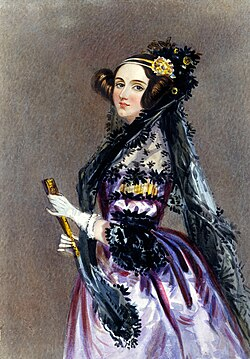

Em 1843 foi publicada a tradução de Ada Lovelace, do francês para o inglês, das notas tomadas por Luigi Menabrea durante uma aula de Charles Baggage.

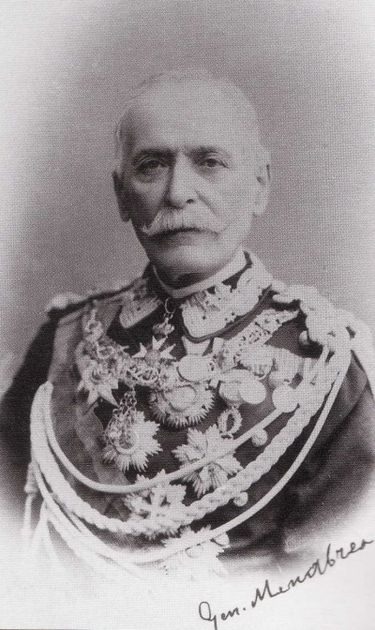

Além da tradução, Lovelace publicou 7 notas, nomeadas de A a G, onde na nota G se encontra o primeiro programa de computador já escrito:

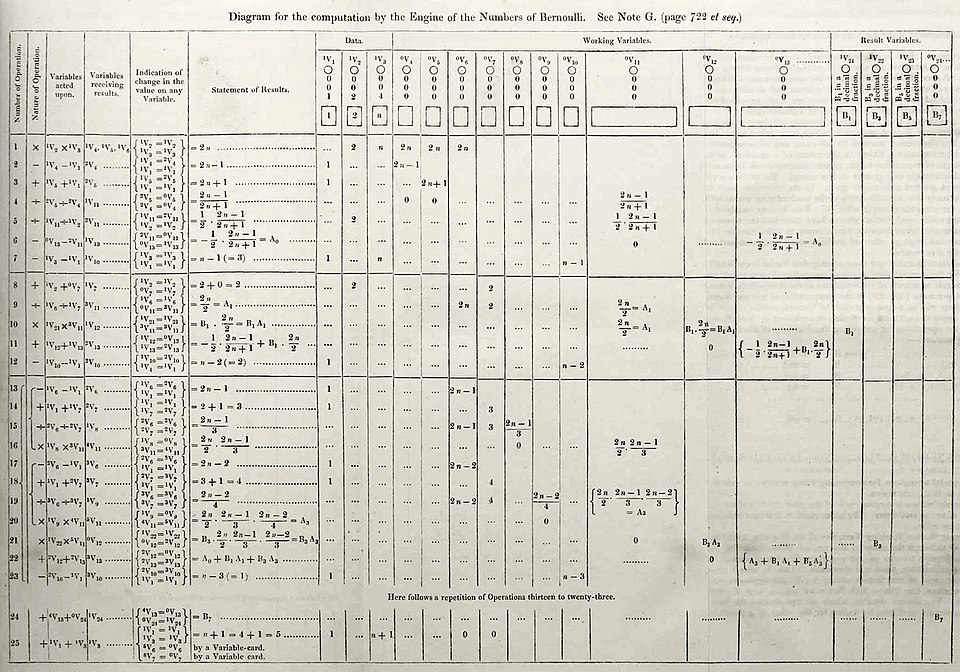

A ideia desse programa era calcular os números de Bernoulli utilizando a máquina análitica de Charles Baggage.

"A máquina pode arranjar e combinar seus valores numéricos exatamente como se fossem letras ou qualquer outro símbolo genérico;
e na verdade ela poderia apresentar seus resultados em notação algébrica, desde que se adotem medidas adequadas."

(Ada Augusta, 1844 in Donald E. Knuth, 1973, p. 1)

# Só mais um pouquinho de história...

**Dado** tem sido tratado como algo externo ao **programa** até este momento da história, e isso se perpertua no desenvolvimento das primeiras linguagens de programação.

A estrutura sintática clássica que conhecemos hoje:
```C
int main(void) {
    int x = 1;
    int y = 2;
    return x + y;
}
```
encontrada em linguagens como `C`, `C++`, `Java` e ...
Vêm desde o `Algol`.

# LISt Processing (LISP) e uma visão diferente
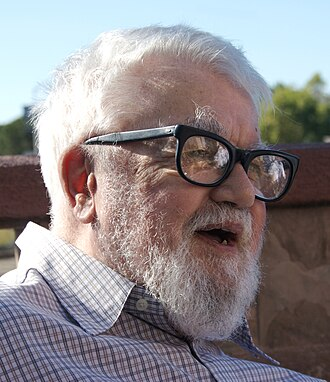

Em 1960 Jhon McCarthy publicou seu paper *Recursive Functions of Symbolic Expressions and Their Computation by Machine, Part I*, responsável pela primeira descrição de uma linguagem LISP.

Dentre as principais diferenças, a mais notável é que LISP não separava dados de código, tudo é dado!

Por exemplo, na linguagem *Scheme*, um programa que soma todos os números uma lista é dado por:

```scheme
(define (soma l)
  (if (nil? l)
      0
      (+ (car l) (soma (cdr l)))) 

(soma '(1 2 3)) ; -> 6
```

Perceba 2 características da função acima:
1. A função é recursiva (vide o nome do paper);
2. Lista e código são representados da mesma forma.

PS: Esse código é longe de ser o melhor para resolver esse problema, mas o que vale é a intenção... 😞

##### Uma breve nota sobre `quote` (`` ' ``)

Como lista pode ser tanto código como dado, o macro `quote` é utilizado para dizer ao compilador/interpretador "Raposo... não compute!".

Ou seja: `'(1 2 3) -> (quote (1 2 3)) -> "Não compute (1 2 3)"`

Caso contrário o compilador/interpretador tentaria tratar `1` como uma função e retornaria um erro.

# Estamos chegando lá...

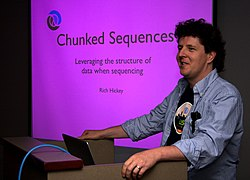

Vamos dar um salto enorme na história e irmos para 2007, onde Rich Hickey libera ao público a implementação de sua linguagem Clojure.

Clojure é um LISP que roda na Java Virtual Machine (JVM) e trás consigo um diferencial enorme em comparação a outros lisps:
Código pode ser representado por diversas estruturas de dados, não somente listas...

Em geral, clojure possui 4 estruturas de dados:
* Listas:    `(1 2 3)`
* Vetores:   `[1 2 3]`
* Mapas:     `{:a 1, :b 2}`
* Conjuntos: `#{1 2 3}`

E todas elas são utilizadas para descrever código!

O exemplo acima seria reescrito em clojure como:

In [ ]:
(defn soma
    [l]
    (if (empty? l)
        0
        (+ (first l)
           (soma (rest l)))))

In [ ]:
(soma '(1 2 3))

Aqui mora um segredo! Nossa função é tão genérica que ela pode ser aplicada a qualquer outra estrutura de dados apresentadas anteriormente (com exceção do mapa, que relaciona `chave` e `valor`).

In [ ]:
(soma [1 2 3])

In [ ]:
(soma #{1 2 3})

# **DATOMIC**!!! (FINALMENTE)

Em 2013 Rich Hickey apresenta ao mundo um novo banco de dados, com um designe bem diferente do tradicional... (ou não)

"Datomic é um banco de dados de uso geral destinado a sistemas de registro. Em muitos aspectos, Datomic é incomum." (Kingsbury, 2024)

# Um pouco de Teoria.

Iremos dividir a teoria em 4 partes:
* Introdução;
* Arquitetura;
* Modelo de transação;
* Consistência (ACID).

Durante a teoria vamos mostrar um pouco de código, por isso escolhemos o binder!

Para começar, iremos mostrar o processo de criação de um banco de dados em Datomic onde focaremos em definições de schemas e transações.

Ao final iremos utilizar um banco de dados já existente (music brainz), onde focaremos em consultas mais complexas.

### Como acompanhar?

No binder, abra uma nova aba e selecione o terminal, no terminal digite:

```bash
cd
cd src/datomic-pro-1.0.7394/
bin/transactor config/samples/dev-transactor-template.properties 
```
E espere o sistema devolver:
```
System started
```

Se quiser pode fechar essa aba agora!

Ta bom, o que eu acabei de fazer?

Datomic é um banco de dados **distribuído**, sendo assim, ele separa a reponsabilidade de diferentes funções para diferentes processos.

O que você acabou de fazer foi lançar um **transactor** que, como o nome diz, é responsável por controlar as transações. 

Iremos explicar isso mais a fundo na sesssão de arquitetura.

Agora vamos importar algumas bibliotecas importantes, como o próprio Datomic.

Basta computar o bloco a seguir, você pode clicar no bloco e:
* Apertar no botão de play acima;
* Apertar ctrl+enter;
* Apertar shift+enter.

In [ ]:
(require '[clojupyter.misc.helper :as helper]
         '[clojure.pprint :as pp])

(helper/add-dependencies '[com.datomic/peer "1.0.7394"])

(require '[datomic.api :as d])

Por fim, vamos criar nosso banco de dados:

Primeiramente definimos uma uri

In [ ]:
(def db-uri "datomic:dev://localhost:4334/mini-gde")

Agora criamos um novo banco de dados nessa uri:

In [ ]:
(d/create-database db-uri)

Agora conectamos ao banco de dados. 

A função que cria a conexão também a retorna, pois tudo é DADO! 

Sendo assim, vinculamos o símbolo `conn` ao retorno da função `d/connect` aplicada ao valor do símbolo `db-uri`

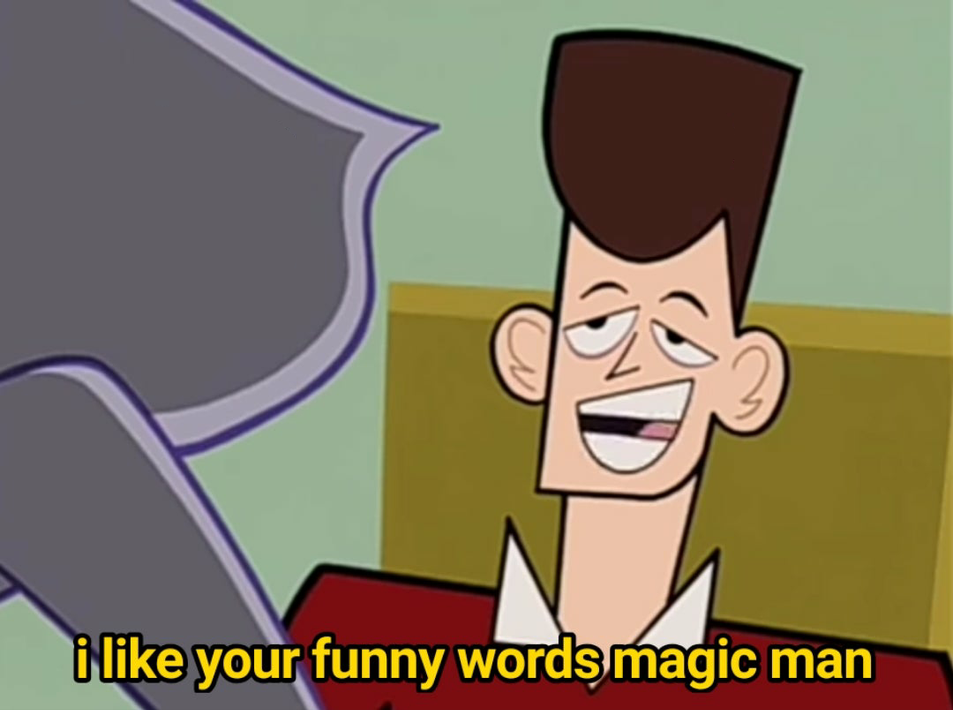

Em outras palavras, definimos uma variável `conn` que possui como valor um objeto que representa a conexão com nosso banco de dados

In [ ]:
(def conn (d/connect db-uri))

Vamos testar, `conn` deve retornar um objeto do tipo `datomic.peer.Connection`:

In [ ]:
conn

Fun fact: Como tudo é dado, podemos extrair o banco de dados da nossa conexão:

In [ ]:
(d/db conn)

Perfeito! Agora podemos começar a brincadeira 😄!

# Introdução

Parte da peculiaridade do Datomic se encontra em seu modelo de informação, em qualquer instante no tempo o estado do banco de dados é representado por um conjunto `[entidade, atributo, valor]`, triplas (`EAV`), conhecidos como `datoms`.

Cada datom declara que alguma `entidade`, por exemplo, um **professro**, possui algum `atributo`, como um **nome**, com algum `valor`, como **Emanuel**.

Os tipos e cardinalidades dos atributos são controlados por um `schema`:

In [ ]:
(def schema [;; ID do professor
             {:db/ident       :professor/id
              :db/valueType   :db.type/uuid
              :db/cardinality :db.cardinality/one
              :db/unique      :db.unique/identity}
             ;; Nome do professor
             {:db/ident       :professor/nome
              :db/valueType   :db.type/string
              :db/cardinality :db.cardinality/one}
             ;; Disciplinas que o professor está lecionando
             {:db/ident       :professor/disciplinas
              :db/valueType   :db.type/ref           ; Referência ao que? Cabe ao banco de dados decidir!
              :db/cardinality :db.cardinality/many}
             ;; Id da disciplina
             {:db/ident       :disciplina/id
              :db/valueType   :db.type/uuid
              :db/cardinality :db.cardinality/one
              :db/unique      :db.unique/value}
             ;; Nome da disciplina
             {:db/ident       :disciplina/nome
              :db/valueType   :db.type/string
              :db/cardinality :db.cardinality/one}
             ;; Código da disciplina
             {:db/ident       :disciplina/codigo
              :db/valueType   :db.type/ref
              :db/cardinality :db.cardinality/one
              :db/unique      :db.unique/value}
             ;; Enum de disciplinas
             {:db/ident       :disciplina.codigo/MC346}
             {:db/ident       :disciplina.codigo/MC536}
             {:db/ident       :disciplina.codigo/MC750}
             {:db/ident       :disciplina.codigo/outro}])

O `schema` define uma entidade `professor` com atributos `id`, `nome` e `disciplinas` que por sua vez é uma entidade com `id`, `nome` e `código`.

NOTA: Nós só definimos mesmo, nada foi feito em relação ao banco de dados, ainda...

### Continuando...
Datomic é um banco de dados temporal, onde o tempo é modelado de forma **explicita**.

Toda transação é identificada por um **marcador de tempo** (timestamp).

Mais especificamente um **marcador de tempo lógico estritamente monotônico** `t`, tal como um "tempo de relógio" `txInstant`.

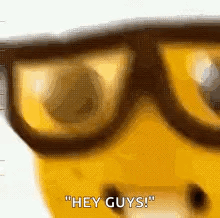

Transações podem "adicionar" (`assert`) um datom, adicionando ele ao banco de dados, ou "recolher" (`retract`) um datom, removendo ele do banco de dados.

Todo datom também retém uma referência a transação que "adicionou" ou "recolheu" ele.

Sendo assim, um datom completo é uma quíntupla `[entidade, atributo, valor, transação, op?]`, onde `op` é um booleano que indica se o datom está presente (a transação o adicionou) ou ausente (a transação o recolheu).

Por fim, o banco de dados é um conjunto de cada vez maior dessas quíntuplas.

# Vantagem:
Esse modelo temporal permite que o usuário posso requisitar uma "foto" de qualquer instante (`snapshot`), hoje ou anos no passado.

Além disso, o Datomic é auto auditável, ou seja, todo o histórico de transações é gravado em nele mesmo. 

Permitindo ao usuário realizar perguntas como: "Onde o apresentador Celso Portiolli estava no dia 11 de setembro de 2001?"

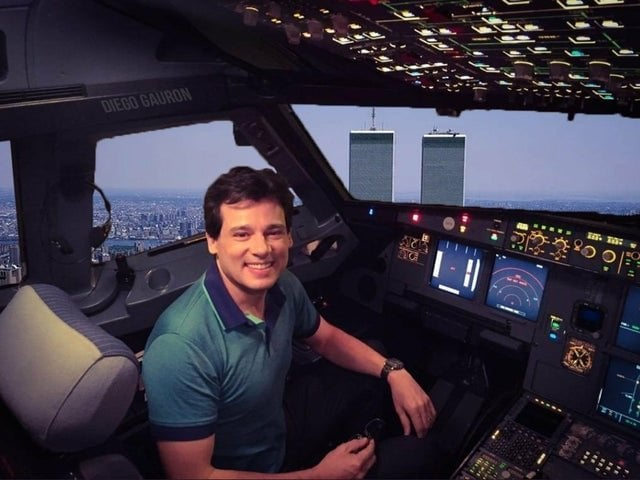

Vamos adicionar o schema anterior ao nosso banco de dados (sim, é só uma transação):

In [ ]:
(-> @(d/transact conn schema) ; Transação
    pp/pprint                 ; Preety Printer (printa a transação de forma mais legível
    )

Observe que a transação acima é formada por:
* `db-before`: O estado do banco de dados antes da transação;
* `db-after`: O estado do banco de dados após a transação;
* `tx-data`: Os dados transacionados. Perceba que o primeiro dado é a transação em si:
  * A `entidade` é representada pelo primeiro valor;
  * O `id` do `atributo` o segundo valor;
  * O `valor` do `atributo` o terceiro valor, sendo esse o "tempo de relógio";
  * A `transação` nesse caso é a própria `entidade`;
  * O `op?`, nesse caso sabemos que a transação foi de adição, logo, `true`.
* `tempids`: Um mapa que especifica entidades em que um autor da transação não sabe ou não se importa em fornecer um ID de entidade.

Vamos adicionar um professor:

In [ ]:
;;  UUID semi sequencial, mais performático que `uuid` v4.
(defonce professor-id (d/squuid))
(defonce mc536-id (d/squuid))

(-> @(d/transact conn [{:professor/id   professor-id
                        :professor/nome "Emanuel"
                        :professor/disciplinas 
                        [{:db/id             "E" ; tempid
                          :disciplina/id     mc536-id
                          :disciplina/codigo :disciplina.codigo/MC536
                          :disciplina/nome   "Bancos de Dados: Prática e Teoria"}]}])
    pp/pprint)

# Arquitetura
Como explicado anteriormente, o Datomic é **distríbuido**, por conta disso ele inclui diversos serviços cooperativos.

* `Transactors`: Executam transações, mantém índices e escreve dados no armazenamento;
* `Peers`: São grandes clientes, eles incorporam uma biblioteca da **JVM** que submete transações para os `transactors`, executam consultas e fazem cache dos resultados;
* `Clients`: São pequenos clientes que encaminham transações e consultas para um `server peer`: um peer que executa uma pequena API na rede.

Internamente o Datomic anexa (`append`) cada transação para o `log`: um conjunto de transações ordenado por tempo.

No `log` o Datomic mantém quatro índices ordenados por diferentes permutações de `entidade`, `atributo`, `valor` e `transação` (`EAVT`).

Esses índices permitem consultas mais eficiente, por exemplo: "Quais entidades foram modificadas ontem?" ou "Quem controla a Terra?"[1].

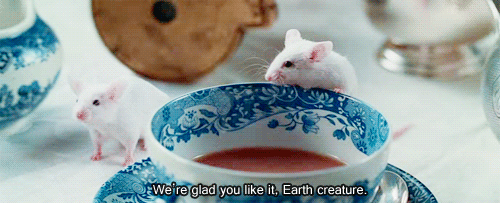
- [1] ratos

Tanto os `logs` quanto os índices são armazenados como árvores persistentes e imutáveis em um armazenamento de dados como o `DynamoDB` ou `Cassandra`.

Porque os nós das árvores são **imutáveis**, seu armazenamento de **backup** só precisar garantir consistência eventual.

Um pequeno ponteiro para as raizes dessas árvores fornecem um `snapshot` **consistente** e **imutável** do banco de dados.

Para commitar uma transação, o transactor salve novos nós **imutáveis** ao armazenamento e então executa `compare-and-set` (`CaS`) para avançar o ponteiro da raiz.

A operação de `CaS` deve ocorrer sobe consistência sequencial.

Usar um `CaS` sequencial garante uma ordem **global** de transação, mas limita a habilidade de escrita do datomic a velocidade de um único `transactor`.

Para reduzir a contenção, o Datomic tenta ter ao menos um `transactor` ativo a todo momento. 

# Modelo de Transação

O modelo de transação do Datomic é outra característica peculiar. Ele impõe uma separação rigorosa entre os caminhos de leitura e gravação.

Não há transações interativas. Os procedimentos são armazenados, mas eles não podem retornar valores para o chamador.

Uma leitura obtém um estado **imutável** de todo o banco de dados. Dado um estado do banco de dados, o usuário pode rodar qualquer número de consultas.

Consultas buscam datoms de forma preguiçosa no cache ou armazenamento, ou seja, o valor dos datoms só é de fato calculado quando utilizado.

Isso garante que a mesma busca, no mesmo estado do banco de dados, independente do Tempo, do Computador ou do Universo deve retornar o mesmo resultado!

Por fim, uma transação é simplesmente um vitor de vetores ou mapas, onde cada um é uma declaração na transação

### Exemplo:
O professor emanuel também leciona a disciplina de Construção de Interfaces Homem-Computador (`MC750`).
Além disso, o nome da disciplina de banco de dados está errado, o correto é: "Banco de Dados: Teoria e Prática"

Podemos resolver ambos os problemas em uma única transação:

In [ ]:
(defonce mc750-id (d/squuid))

(-> @(d/transact conn [;; Adiciona a disciplina mc750 na lista de displinas lecionadas pelo professor Emanuel no formato de mapa
                       {:professor/id   professor-id
                        :professor/nome "Emanuel"
                        :professor/disciplinas 
                        [{:db/id             "C" ; tempid
                          :disciplina/id     mc750-id
                          :disciplina/codigo :disciplina.codigo/MC750
                          :disciplina/nome   "Construção de Interfaces Homem-Computador"}]}
                       ;; Altera o nome da disciplina no formato de lista
                       [:db/add [:disciplina/id mc536-id] :disciplina/nome "Banco de Dados: Teoria e Prática"]])
    pp/pprint)

Utilizando somente listas teriamos algo assim para adicinar a disciplina mc750 para o professor Emanuel:

```clojure
@(d/transact conn [;; Cria a disciplina MC750
                   [:db/add "C" :disciplina/id mc750-id]
                   [:db/add "C" :disciplina/codigo :disciplina.codigo/MC750]
                   [:db/add "C" :disciplina/nome "Construção de Interfaces Homem-Computador"]
                   ;; Associa a disciplina ao professor
                   [:db/add professor-id :professor/disciplinas "C"])
```


O que o `:db/add` fez é chamado de "recolher" implicito, pois em momento algum o comando `:db/retract` foi dado, o datomic percebeu por si só que a operação demandava um `retract`. 

Embora as funções de transação possam tomar decisões com base nos resultados das leituras que realizam internamente, não há nenhum canal para retornar essas leituras (ou outras informações) para o "chamador" (`caller`) da transação.

As transações retornam apenas os efeitos. Isso significa que não há um análogo direto para uma transação de leitura e gravação arbitrária no Datomic! 

Por exemplo, você pode escrever uma função que realiza uma gravação tradicional, mas não pode informar ao "chamador" se a gravação ocorreu ou não.

Essa restrição leva os usuários do Datomic a retirar as leituras do caminho da transação de gravação - um fator-chave para obter um bom desempenho de um sistema que pode executar logicamente apenas uma transação de gravação por vez.

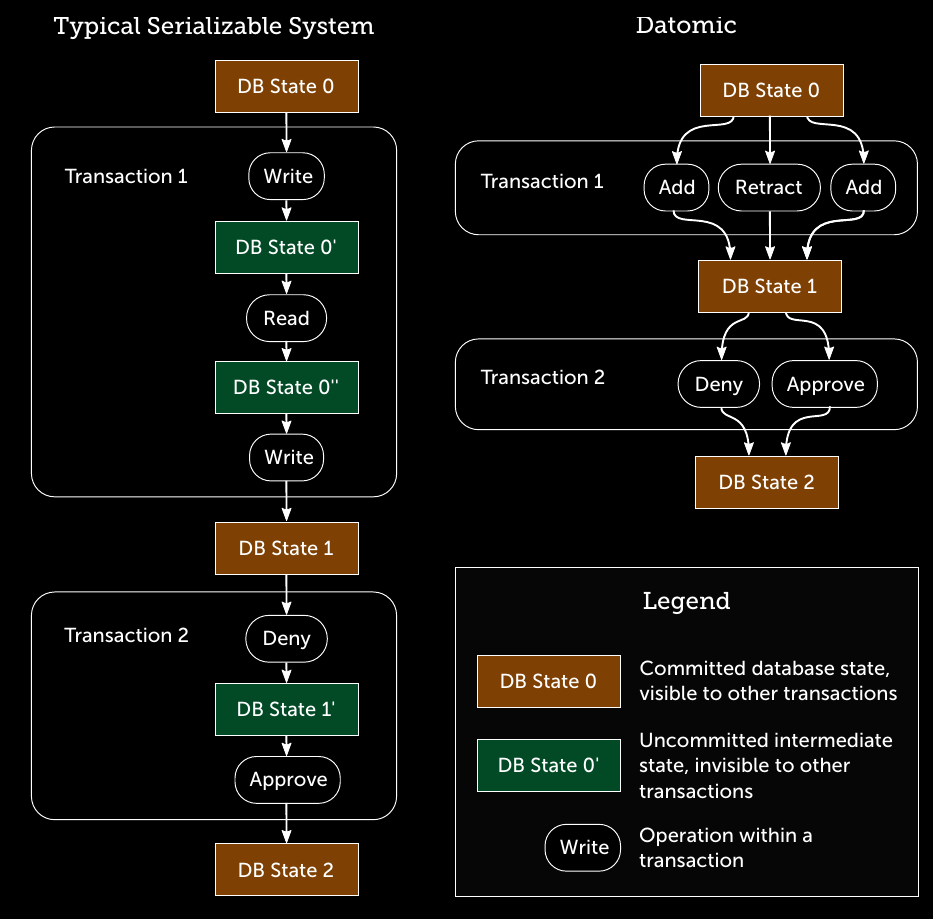

Do ponto de vista dos sistemas de banco de dados tradicionais, isso parece absurdo.

As transações mistas de leitura e gravação são um elemento básico das cargas de trabalho OLTP - como seria possível fazer qualquer coisa sem elas?

O Datomic oferece uma visão de um universo alternativo: um universo em que os `snapshots` de banco de dados são baratos, eficientes e podem ser transmitidos de nó para nó com apenas um registro de data e hora.

Desse ponto de vista, outros bancos de dados parecem empobrecidos. 

Como assim? O Postgres não pode fornecer o estado de todo o banco de dados em uma transação observada"

A falta de um canal de retorno para funções de transação pode ser irritante, mas os outros pontos fortes do Datomic geralmente permitem que ele resolva os mesmos tipos de problemas que um sistema de transação tradicional e interativo.

Por exemplo, o *NuBank* (os atuais desenvolvedores da Datomic) oferece serviços financeiros a quase 94 milhões de usuários, processando uma média de 2,3 bilhões de transações de usuários por dia. 

Quase todos os seus produtos usam a Datomic como um sistema de registro.

# Consistência
A Datomic se diz ACID e fala sério!

Dua [documentação ACID](https://docs.datomic.com/transactions/acid.html) faz promessas detalhadas e específicas com relação a modelos de consistência e garantias de durabilidade:

* As transações são “gravadas no armazenamento em uma única gravação atômica”, o que exclui anomalias de leitura intermediária.
* Cada `peer` “vê as transações concluídas a partir de um determinado momento” e observa **todas** as transações, totalmente ordenadas, até esse momento.
* As transações são sempre transferidas para o armazenamento durável antes da confirmação do cliente.

# UFA! Acabou???

Não! Ainda tem mais. Vamos falar sobre as consultas em datomic!

Datomic fornece 3 modelos de busca:
* Uma api estilo datalog `(d/q '[:find ...] ...)`;
* Uma api declarativa de percorrer um grafos `(d/q '[:find (pull ...) ...] ...)`;
* Um estilo `ODM`  de computar valores de uma entidade.

O terceiro é, na verdade, somente código clojure, meio sem graça e bem pouco utilizado. Por conta disso iremos mostrar somente um exemplo simples:

Definimos uma váriavel `emanuel` que se refere ao professor "Emanuel":

In [ ]:
(def emanuel
    (d/entity (d/db conn) [:professor/id professor-id]))

In [ ]:
emanuel

In [ ]:
(:professor/nome emanuel)

Uma busca pode retornar mais `db/id`

In [ ]:
(:professor/disciplinas emanuel)

Que por sua vez podem ser tratados com mais código...

In [ ]:
(->> emanuel
     :professor/disciplinas
     (map #(vector (:disciplina/codigo %) (:disciplina/nome %)))
     (into {})
     (assoc {} (:professor/nome emanuel)))

# Consultas mais interessantes...
Para prosseguir aqui, vamos roubar um banco de dados mais rico.

Para isso, vamos utilizar o music brainz de 1968 a 1973.

Esse banco possui a seguinte arquitetura:

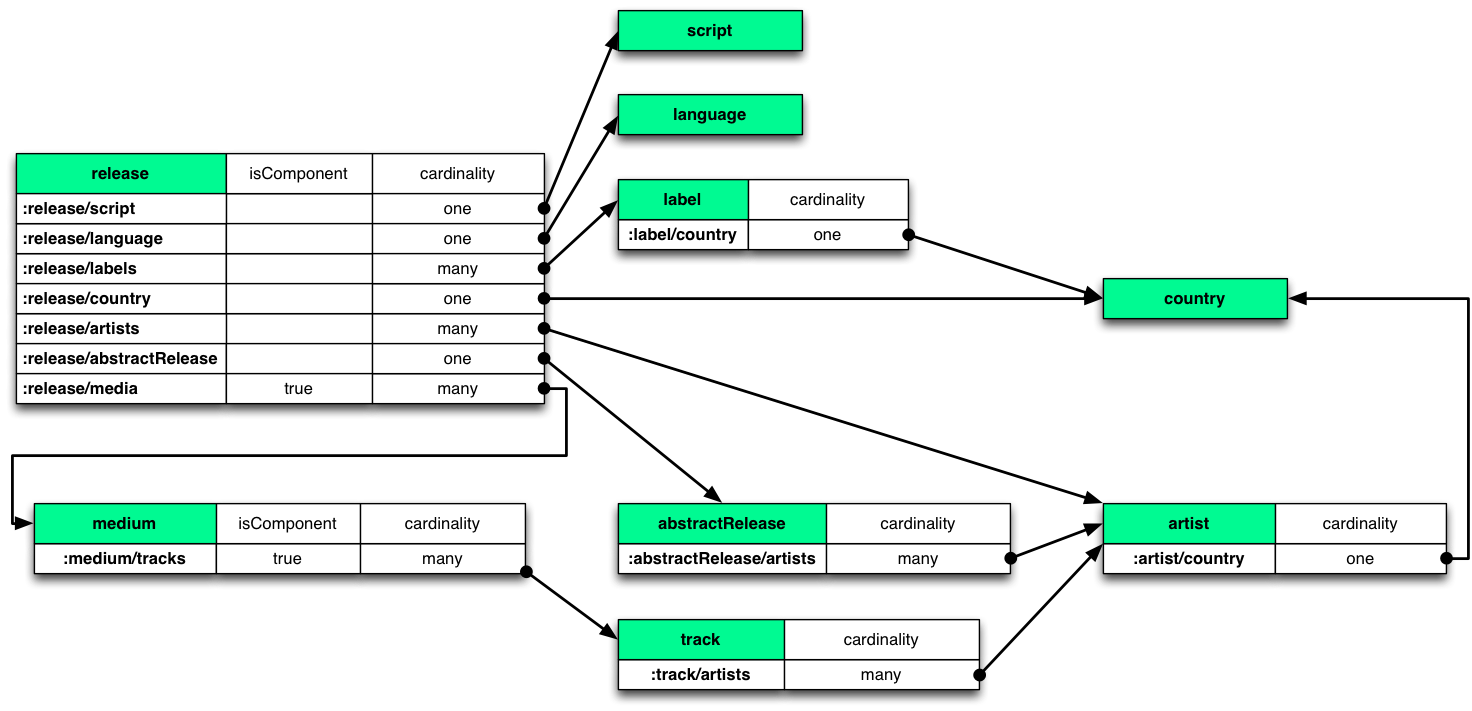

# Como conectar?
Abra outro terminal e escreva:

```bash
cd 
cd src/datomic-pro-1.0.7394
bin/datomic restore-db file:../mbrainz-1968-1973 datomic:dev://localhost:4334/mbrainz-1968-1973
```

Agora execute:

In [ ]:
(def db-uri "datomic:dev://localhost:4334/mbrainz-1968-1973")
(def conn (d/connect db-uri))

;; Como não vamos estar alterando o estado desse db, podemos já definir uma váriavel!
(def db (d/db conn))

# Uma query simples:

O primeiro elemento de toda query é a palavra-chave `:find` que define o que a consulta vai retornar.
O segundo elemento é a palavra-chave `:where` que define onde os dados de `find` serão buscados.

E bem, é isso...

Lembra que todo datom é uma quíntupla `[entidade atributo valor transação op?]`?

Vamos buscar todas elas para alguns elementos do nosso banco:

In [ ]:
(-> (d/q
     ;; Consulta
     '[:find ?e ?a ?v ?t ?op
       :where 
       [?e :artist/name "Roger Waters"]
       [?e ?a ?v ?t ?op]]
     ;; Banco de Dados
     db)
    ;; Pretty Printer
    set
    pp/pprint)

Perceba que o dado retornado não é muito amigável ao olho humano...

Isso porque nossa consulta é completamente vazia de significado, ela pede ao Datomic para retornar todos as quíntuplas `[entidade atributo valor transação op?]` onde o atributo `:artist/name` é "Roger Waters".

O que o Datomic faz é obedecer! Ele retorna as representações internas desses dados.

Vamos fazer uma query que faça um pouco mais de sentido...

Vamos buscar por todos os álbuns do **Roger Waters** (solo):

In [ ]:
(d/q '[:find ?albums
       :where
       [?artist :artist/name "Roger Waters"]
       [?release :release/artists ?artist]
       [?release :release/name ?albums]]
     db)

É, o Pink Floyd estava firme e forte nessa época.

Vamos pegar um exemplo com mais dados, todos os álbuns do **John Lennon** (solo).

In [ ]:
(-> (d/q '[:find ?albums
           :where
           [?artist :artist/name "John Lennon"]
           [?release :release/artists ?artist]
           [?release :release/name ?albums]]
         db)
    set
    pp/pprint)

Me pergunto o que aconteceu entre 1968 e 1973 que fez o John Lennon lançar tantos trabalhos solo...

Perceba que ambas as consultas acima são idênticas com exceção do nome do artista.

Por razões de reusabilidade, `d/q` aceita também a palavra-chave `:in`, de **input**.

Veja como a consulta acima poderia ser generalizada:

In [ ]:
(-> (d/q '[:find ?albums
           :in $ ?artist-name
           :where
           [?artist :artist/name ?artist-name]
           [?release :release/artists ?artist]
           [?release :release/name ?albums]]
         db      
         "Paul McCartney") ; Input extra
    set
    pp/pprint)

No exemplo acima `$` representa o banco, sendo essa a notação adotada, enquanto `?artist-name` representa o nome do artista, nesse caso **Paul McCartney**

Por fim, podemos transformar a query acima em uma função:

In [ ]:
(defn albums
    [db artista]
    (d/q '[:find ?albums
           :in $ ?artist-name
           :where
           [?artist :artist/name ?artist-name]
           [?release :release/artists ?artist]
           [?release :release/name ?albums]]
         db      
         artista))

(-> db
    (albums "Elis Regina")
    set
    pp/pprint)

# Para finalizar

O `pull` é uma forma declarativa de percerrer os grafos gerados por um consulta em Datomic, sendo esses grafo definidos em termos das estruturas primitivas do Clojure.

Por exemplo, a consulta a seguir retorna o nome, ano, todas as informações sobre o script e o nome de todas as músicas de todos os álbuns lançados pela **Elis Regina** entre 1968 e 1973:

In [ ]:
(-> (d/q '[:find (pull $ ?release
                       [:release/name :release/year {:release/script [*]}
                        {:release/media [{:medium/tracks [:track/name]}]}])
           :in $ ?artist-name
           :where
           [?artist :artist/name ?artist-name]
           [?release :release/artists ?artist]]
          db "Elis Regina")
    pp/pprint)

##### Existem mais algumas dezenas de coisa a serem faladas sobre o Datomic, mas infelizmente nosso tempo não permite ☹